## Importing libraries

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm


## Importing Dataset

In [93]:
products = pd.read_csv("C:/Users/HP/FDataset.csv",encoding='latin1') 
products.head()

,Product Name,Nutri Score,Bar Code No.,Ingredients
0,Redbull - Red Bull - 1,E,90162602,"carbonated water, sugar, glucose, citric acid,..."
1,Diet coke - The Coca-Cola Company - 500 ml,B,54491496,"csd water, caramel color, aspartame, phosphori..."
2,"Eau de source - Cristaline - 1,5 L",A,3.27E+12,water
3,Crunchy oats&honey - Nature Valley - 210 g (5 ...,C,8.41E+12,"whole grain, oat flakes ,sugar, refined sunflo..."
4,Simply Delicious Muesli - Dorset Cereals - 650g,B,5.02E+12,"whole grain oat flakes, wholegrain wheat flake..."


In [94]:
products[products.isnull().any(axis=1)]

,Product Name,Nutri Score,Bar Code No.,Ingredients


In [95]:
# products.drop('Unnamed: 4', inplace=True, axis=1)
# products.drop('Unnamed: 5', inplace=True, axis=1)

In [96]:
products[products.isnull().any(axis=1)]

,Product Name,Nutri Score,Bar Code No.,Ingredients


## Categorical Values

In [97]:
categorical = [var for var in products.columns if products[var].dtype=='O']
numerical = [var for var in products.columns if products[var].dtype!='O']

In [98]:
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 4 categorical variables : 
 ['Product Name', 'Nutri Score', 'Bar Code No.', 'Ingredients']


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
# Extract features (Ingredients) and labels (A, B, C, D, E)
X = products['Ingredients']  # Text data
y = products['Nutri Score']  # Harmfulness categories (A, B, C, D, E)

# Convert text ingredients into numerical features
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(X)  # This creates a sparse matrix of word counts

## Split into training and testing sets

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=1)

# Here test_size has been choosen as 0.2 that is 20 percent of the data will be used for testing purposes 
# an the rest 80 percent will be used for training purposes

In [101]:
print(X.head())

0    carbonated water, sugar, glucose, citric acid,...
1    csd water, caramel color, aspartame, phosphori...
2                                                water
3    whole grain, oat flakes ,sugar, refined sunflo...
4    whole grain oat flakes, wholegrain wheat flake...
Name: Ingredients, dtype: object


In [113]:
# from matplotlib import pyplot as plt
# plt.scatter(X,y, c=y, cmap='rainbow')
# plt.title("Plot For Random Forest")
# plt.show()

In [103]:
print(y.head())

0    E
1    B
2    A
3    C
4    B
Name: Nutri Score, dtype: object


## Random Forest Classifier and testing

In [104]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=1
)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=1)

In [105]:
from sklearn.metrics import classification_report, accuracy_score
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           A       0.61      0.77      0.68        26
           B       0.83      0.43      0.57        23
           C       0.30      0.35      0.33        20
           D       0.32      0.29      0.30        24
           E       0.69      0.73      0.71        52

    accuracy                           0.57       145
   macro avg       0.55      0.52      0.52       145
weighted avg       0.58      0.57      0.56       145

Accuracy Score: 0.5655172413793104


## Accuracy of the model comes out to be low as the data needs more refinement and proper labelling with less inconsistencies

In [106]:
print(y_train.value_counts())

Nutri Score
E    192
D    109
C    107
A     91
B     80
Name: count, dtype: int64


## Trying out the model on a new product

In [122]:
def labels(n):
    if(n == 'A'):
        return("Very Good")
    elif(n == 'B'):
        return("Good")
    elif(n == 'C'):
        return("Average")
    elif(n == 'D'):
        return("Poor")
    else:
        return("Very Poor")

In [123]:
# Example new product
new_product = ["sugar, sodium benzoate, palm oil"]  
new_product_features = vectorizer.transform(new_product)

# Predict the harmfulness category
predicted_label = rf_model.predict(new_product_features)
print("NutriScore:", labels(predicted_label[0]))

NutriScore: Very Poor


In [129]:
# Example new product
new_product = ["wheat flour, olive oil, salt, Artificial Flavors"]  
new_product_features = vectorizer.transform(new_product)

# Predict the harmfulness category
predicted_label = rf_model.predict(new_product_features)
print("NutriScore:", labels(predicted_label[0]))

NutriScore: Average


In [128]:
# Example new product
new_product = ["wheat flour, fiber, extracts"]  
new_product_features = vectorizer.transform(new_product)

# Predict the harmfulness category
predicted_label = rf_model.predict(new_product_features)
print("NutriScore:", labels(predicted_label[0]))

NutriScore: Very Good


In [127]:
# Example new product
new_product = ["sugar, carbonated water, emulsifiers"]  
new_product_features = vectorizer.transform(new_product)

# Predict the harmfulness category
predicted_label = rf_model.predict(new_product_features)
print("NutriScore:", labels(predicted_label[0]))

NutriScore: Very Poor


In [126]:
# Example new product
new_product = ["peanuts, potato, edible vegetable oil"]  
new_product_features = vectorizer.transform(new_product)

# Predict the harmfulness category
predicted_label = rf_model.predict(new_product_features)
print("NutriScore:", labels(predicted_label[0]))

NutriScore: Good


In [131]:
from sklearn.metrics import confusion_matrix
y_pred_rf = rf_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
 [[20  0  2  4  0]
 [ 4 10  4  3  2]
 [ 3  0  7  3  7]
 [ 2  0  7  7  8]
 [ 4  2  3  5 38]]


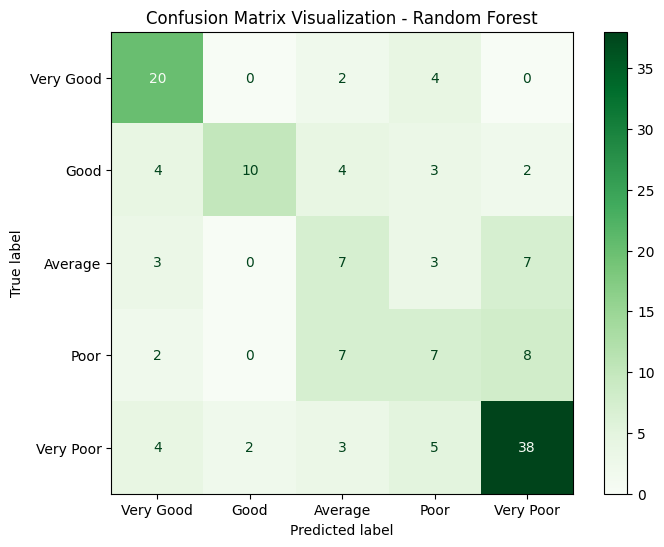

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix data
confusion_matrix1 = np.array(confusion_matrix(y_test, y_pred_rf))

# Class labels
class_labels = ["Very Good", "Good", "Average", "Poor", "Very Poor"]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=class_labels)
disp.plot(cmap="Greens", ax=ax, values_format='d')

plt.title("Confusion Matrix Visualization - Random Forest")
plt.show()

In [136]:
np.save("random_forest_predictions.npy", y_pred)
np.save("random_forest_accuracy.npy", [accuracy_score])